In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1
# a.


In [3]:
# importing the dataset by reading the csv file
data = pd.read_csv('data.csv')
data

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


# b.

In [4]:
# checking the class type of the object
print(type(data))

# checking how much data the csv contains
# number of rows and columns
print(data.shape)

# quickly displaying data from first n rows and last n rows
print(data.head())
print(data.tail())

# checking the index dtype, column dtypes, non-null values and memory usage only with one input
print(data.info())

# rebuild missing data
# the null value will not give us any operation but is a placeholder
# to avoid compilation errors, we need to fix it.
# make sure if there is no null values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
(244, 6)
   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4
     total_bill   tip smoker   day    time  size
239       29.03  5.92     No   Sat  Dinner     3
240       27.18  2.00    Yes   Sat  Dinner     2
241       22.67  2.00    Yes   Sat  Dinner     2
242       17.82  1.75     No   Sat  Dinner     2
243       18.78  3.00     No  Thur  Dinner     2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    

In [5]:
# checking how many times a specific values occur in a column
dat1 = data['smoker'].value_counts()
print(dat1)

No     151
Yes     93
Name: smoker, dtype: int64


In [6]:
# computing the basic statistics first for all
# records in a single column
print(data['smoker'].describe())


count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object


Creating a visualization for how many yeses and nos the column 'Smoker' have

In [8]:
# make sure figures appear inline in jupyter notebook
%matplotlib inline

#style sheets reference
plt.style.use('fivethirtyeight')

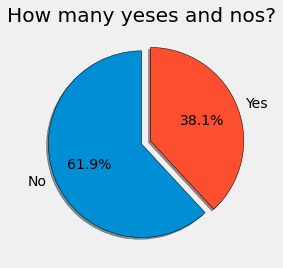

In [9]:
# creating plot with pie chart
# assigning strings and integers to a variable for the plot
labels = ['No', 'Yes']
explode = [0, 0.1]


plt.pie(dat1, labels=labels,
        shadow=True, startangle=90,
        explode=explode, autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'})

#writing the title for the plot
plt.title("How many yeses and nos?")

plt.show()

In [10]:
# checking the value counts in 'day'
dat2 = data['day'].value_counts()
print(dat2)

# displaying the summary statistics in 'day'
print(data['day'].describe())

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object


Creating a pie chart to see value_counts in 'day' from a
pie chart

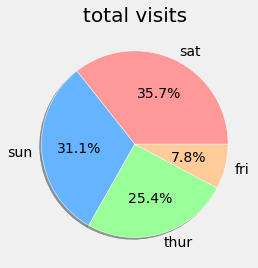

In [12]:
# creating plot with pie chart
labels= ['sat', 'sun', 'thur', 'fri']
colors= ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.pie(dat2, labels=labels,
        shadow=True, autopct='%1.1f%%', colors=colors,
        wedgeprops={'edgecolor':'white'})

plt.title("total visits")
plt.show()

Dinner    176
Lunch      68
Name: time, dtype: int64
count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object


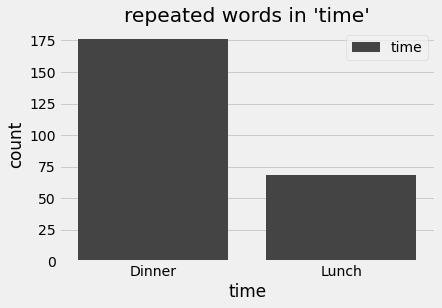

In [13]:
# doing the same thing as the last two ones
dat3 = data['time'].value_counts()
print(dat3)

print(data['time'].describe())

#style sheets reference
plt.style.use('fivethirtyeight')

# plot the summary stats
# this time im using seaborn countplot
sns.countplot(x='time', data=data, color='#444444', label='time')

plt.legend()
plt.title("repeated words in 'time'")

plt.show()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64
count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64


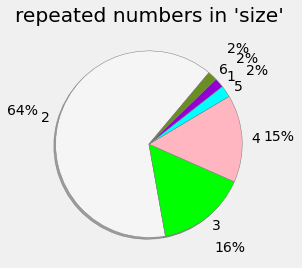

In [14]:
dat4 = data['size'].value_counts()
print(dat4)

print(data['size'].describe())


# creating a string for the label and for colors
labels= [2, 3, 4, 5, 1, 6]
colors= ['whitesmoke', 'lime', 'lightpink', 'aqua', 'darkviolet', 'olivedrab']

#creating pie chart
plt.pie(dat4, labels=labels,
        shadow=True, autopct='%1.0f%%', colors=colors, startangle=50,
        pctdistance= 1.4,
        wedgeprops={'edgecolor':'grey'})
# displaying the percent value with autopct
# position each percentage value at different distance from the center with pctdistance


plt.title("repeated numbers in 'size'")

plt.show()


# c.
# Data Cleaning


In [15]:
#check if any of integer or string or any items in a list are repeated more than one time
# there is no need for duplicate values in data analysis, it will affect the accuracy and efficiency of the analysis result
# de-duplicate
data.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [16]:

#dropping unnecessary columns like 'smoker'
#the attribute does not carry any necessary use of information that I can use

# using the drop() function to remove the column
data.drop('smoker', inplace=True, axis=1)


print(data)

     total_bill   tip   day    time  size
0         16.99  1.01   Sun  Dinner     2
1         10.34  1.66   Sun  Dinner     3
2         21.01  3.50   Sun  Dinner     3
3         23.68  3.31   Sun  Dinner     2
4         24.59  3.61   Sun  Dinner     4
..          ...   ...   ...     ...   ...
239       29.03  5.92   Sat  Dinner     3
240       27.18  2.00   Sat  Dinner     2
241       22.67  2.00   Sat  Dinner     2
242       17.82  1.75   Sat  Dinner     2
243       18.78  3.00  Thur  Dinner     2

[244 rows x 5 columns]


The data does not have any issues
After finding null values, duplicate, and incorrect values,
we should verify the dataset and validate its accuracy



In [17]:
#changing the index of a dataframe
# for most readers it will be easy to read

datanew = data.set_index('day')

datanew

,total_bill,tip,time,size
day,,,,
Sun,16.99,1.01,Dinner,2
Sun,10.34,1.66,Dinner,3
Sun,21.01,3.50,Dinner,3
Sun,23.68,3.31,Dinner,2
Sun,24.59,3.61,Dinner,4
...,...,...,...,...
Sat,29.03,5.92,Dinner,3
Sat,27.18,2.00,Dinner,2
Sat,22.67,2.00,Dinner,2


# d.
Illustrating mine discovery after
my data exploration with a use of visualization

using a displot to see when the bill price was high during the day

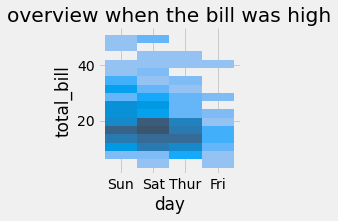

In [18]:
#creating a displot
sns.displot(
    data, x="day", y="total_bill",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)
plt.title('overview when the bill was high')
plt.show()


looks like the dark color tells us that the total bill was high on Saturday

combining two columns into one to see how much costumers paid and when the total amount
 and total bill together was high


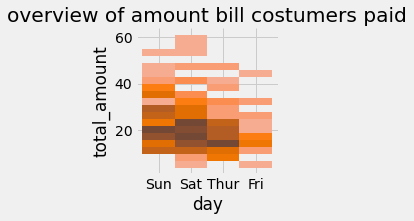

In [19]:

# combining two columns into one to see how much costumers paid and when it was high
data['total_amount'] = data['total_bill']+data['tip']
sns.displot(
    data, x="day", y="total_amount",
    binwidth=3, height=3, color='#ff7f0e',
    facet_kws=dict(margin_titles=True),
)
plt.title('overview of amount bill costumers paid')

plt.show()

looks like thursday takes the lead here

# Task 2
Hospitals in Norway

In [20]:
# storing the information in a dictionary
ous = {'hospital name': 'Oslo university hospital HF',
       'Location': 'Oslo, Norway',
       'Major location': 'Oslo university hospital Ullevål',
       'main campuses': ['Rikshospitalet', 'Ullevål', 'Aker', 'Radiumhospitalet'],
       'Opened': [1826, 1887, 1895, 1932],
       'beds': 1870,
       'total employees': 24000}
print(ous)

# create series from a dictionary
df = pd.Series(ous)
print(df)

{'hospital name': 'Oslo university hospital HF', 'Location': 'Oslo, Norway', 'Major location': 'Oslo university hospital Ullevål', 'main campuses': ['Rikshospitalet', 'Ullevål', 'Aker', 'Radiumhospitalet'], 'Opened': [1826, 1887, 1895, 1932], 'beds': 1870, 'total employees': 24000}
hospital name                            Oslo university hospital HF
Location                                                Oslo, Norway
Major location                      Oslo university hospital Ullevål
main campuses      [Rikshospitalet, Ullevål, Aker, Radiumhospitalet]
Opened                                      [1826, 1887, 1895, 1932]
beds                                                            1870
total employees                                                24000
dtype: object


# b.

In [21]:
# Levanger Hospital
Levanger = {'Hospital Name': 'Levaanger Hospital',
            'Located': 'Levanger, Trøndelag, Norway',
            'Type': 'General',
            'Emergency Department': 'Yes',
            'Opened': 1844,
            'Employees': 1152,
            'Beds': 207}

# convert the dictionary into Series
Ser1 = pd.Series(Levanger)
print(Ser1)

# St. Olavs University Hospital
St_Olavs = {'Hospital Name': 'St. Olavs University Hospital',
            'Located': 'Øya, Trondheim, Norway',
            'Type': 'Teaching',
            'Emergency Department': 'Yes',
            'Opened': 1902,
            'Employees': 11032,
            'Beds': 1000}

Ser2 = pd.Series(St_Olavs)
print(Ser2)

# Nordland Hospital
Nordland = {'Hospital Name': 'Nordland Hospital',
            'Located': 'Bodø, Norway',
            'Type': 'Uknown',
            'Emergency Department': 'yes',
            'Opened': 2002,
            'Employees': 4000,
            'Beds': 0}

Ser3 = pd.Series(Nordland)
print(Ser3)

# Namsos Hospital
Namsos = {'Hospital Name': 'Namsos Hospital',
          'Located': 'Namsos, Norway',
          'Type': 'General',
          'Emergency Department': 'yes',
          'Opened': 1848,
          'Employees': 2500,
          'Beds': 23}

Ser4 = pd.Series(Namsos)
print(Ser4)

# University Hospital of North Norway
North =  {'Hospital Name': 'University Hospital of North Norway',
          'Located': 'Tromsø, Nordland, Norway',
          'Type': 'General',
          'Emergency Department': 'yes',
          'Opened': 2001,
          'Employees': 5700,
          'Beds': 812}

Ser5 = pd.Series(North)
print(Ser5)

# Rikshospitalet
Rikshospitalet = {'Hospital Name':'Rikshospitalet',
                  'Located': 'Gaustad, Oslo, Norway',
                  'Type': 'Teaching',
                  'Emergency Department': 'yes',
                  'Opened': 1826,
                  'Employees': 24000,
                  'Beds': 585}

Ser6 = pd.Series(Rikshospitalet)
print(Ser6)

# Ullevål Hospital
Ullevål = {'Hospital Name': 'Ullevål Hospital',
           'Located': 'Oslo, Norway',
           'Type': 'Teaching',
           'Emergency Department': 'yes',
           'Opened': 1887,
           'Employees': 9500,
           'Beds': 1200}

Ser7 = pd.Series(Ullevål)
print(Ser7)

# Aker Hospital
Aker = {'Hospital Name': 'Aker Hospital',
        'Located': 'Oslo, Norway',
        'Type': 'Uknown',
        'Emergency Department': 'yes',
        'Opened': 1895,
        'Employees': 930,
        'Beds': 138}

Ser8 = pd.Series(Aker)
print(Ser8)

# Sørlandet Hospital Kristiansand
Kristiansand = {'Hospital Name': 'Sørlandet Hospital Kristiansand',
         'Located': 'Kristiansand, Vest-Agder, Norway',
         'Type': 'General',
         'Emergency Department': 'yes',
         'Opened': 2001,
         'Employees': 7272,
         'Beds': 509}

Ser9 = pd.Series(Kristiansand)
print(Ser9)


# Vestfold Hospital Trust
Vestfold = {'Hospital Name': 'Vestfold Hospital Trust',
            'Located': 'Vestfold, Norway',
            'Type': 'General',
            'Emergency Department': 'yes',
            'Opened': 1820,
            'Employees': 5200,
            'Beds': 400}

Ser10 = pd.Series(Vestfold)
print(Ser10)

# Vestre Viken Hospital Trust
Vestre_Viken = {'Hospital Name': 'Vestre Viken Hospital Trust',
                'Located': 'Drammen, Norway',
                'Type': 'General',
                'Emergency Department': 'yes',
                'Opened': 1878,
                'Employees': 9500,
                'Beds': 0}

Ser11 = pd.Series(Vestre_Viken)
print(Ser11)

# Sandviken Hospital
Sandviken = {'Hospital Name': 'Sandviken Hospital',
             'Located': 'Sandvien, Bergen, Norway',
            'Type': 'Psychriatric',
            'Emergency Department': 'yes',
            'Opened': 1891,
             'Employees': 0,
             'Beds': 0}

Ser12 = pd.Series(Sandviken)
print(Ser12)

# Stavanger University Hospital
Stavanger = {'Hospital Name': 'Stavanger University Hospital',
             'Located': 'Våland, Stavanger, Norway',
            'Type': 'General',
            'Emergency Department': 'yes',
            'Opened': 1927,
             'Employees': 7800,
             'Beds': 985}

Ser13 = pd.Series(Stavanger)
print(Ser13)

# Akershus University Hospital
Akershus = {'Hospital Name': 'Akershus University Hospital',
            'Located': 'Lørenskog, Norway',
            'Type': 'Teaching',
            'Emergency Department': 'yes',
            'Opened': 1961,
            'Employees': 10541,
            'Beds': 953}

Ser14 = pd.Series(Akershus)
print(Ser14)

# Western Norway Pharmaceutical Trust
WesternTrust = {'Hospital Name':'Western Norway Pharmaceutical Trust',
                'Located': 'Bergen, Norway',
                'Type': 'Pharmacy',
                'Emergency Department': 'No',
                'Opened': 2002,
                'Employees': 0,
                'Beds': 0}

Ser15 = pd.Series(WesternTrust)
print(Ser15)

# Haukeland University Hospital
Haukeland = {'Hospital Name': 'Haukeland University Hospital',
             'Located': 'Haukeland, Bergen, Norway',
            'Type': 'University hospital',
            'Emergency Department': 'Yes',
            'Opened': 1912,
             'Employees': 13200,
             'Beds': 1100}

Ser16 = pd.Series(Haukeland)
print(Ser16)

Hospital Name                    Levaanger Hospital
Located                 Levanger, Trøndelag, Norway
Type                                        General
Emergency Department                            Yes
Opened                                         1844
Employees                                      1152
Beds                                            207
dtype: object
Hospital Name           St. Olavs University Hospital
Located                        Øya, Trondheim, Norway
Type                                         Teaching
Emergency Department                              Yes
Opened                                           1902
Employees                                       11032
Beds                                             1000
dtype: object
Hospital Name           Nordland Hospital
Located                      Bodø, Norway
Type                               Uknown
Emergency Department                  yes
Opened                               2002
Employees           

# C.

In [22]:
# creating DataFrame from Series generated from step b.

Data2 = pd.DataFrame([Ser1, Ser2, Ser3, Ser4, Ser5, Ser6, Ser7, Ser8, Ser9, Ser10,
                     Ser11, Ser12, Ser13, Ser14, Ser15, Ser16])

Data2

,Hospital Name,Located,Type,Emergency Department,Opened,Employees,Beds
0,Levaanger Hospital,"Levanger, Trøndelag, Norway",General,Yes,1844,1152,207
1,St. Olavs University Hospital,"Øya, Trondheim, Norway",Teaching,Yes,1902,11032,1000
2,Nordland Hospital,"Bodø, Norway",Uknown,yes,2002,4000,0
3,Namsos Hospital,"Namsos, Norway",General,yes,1848,2500,23
4,University Hospital of North Norway,"Tromsø, Nordland, Norway",General,yes,2001,5700,812
5,Rikshospitalet,"Gaustad, Oslo, Norway",Teaching,yes,1826,24000,585
6,Ullevål Hospital,"Oslo, Norway",Teaching,yes,1887,9500,1200
7,Aker Hospital,"Oslo, Norway",Uknown,yes,1895,930,138
8,Sørlandet Hospital Kristiansand,"Kristiansand, Vest-Agder, Norway",General,yes,2001,7272,509
9,Vestfold Hospital Trust,"Vestfold, Norway",General,yes,1820,5200,400


# d.

In [23]:

# create a list that runs in sequence as the Dictionary from the last step c

RHA1 = ['Central Norway Regional Health Authority', 'Central Norway Regional Health Authority',
       'Northern Norway Regional Health Authority',
       'Northern Norway Regional Health Authority',
       'Northern Norway Regional Health Authority', 'Southern and Eastern Norway Regional Health Authority',
       'Southern and Eastern Norway Regional Health Authority',
       'Southern and Eastern Norway Regional Health Authority',
      'Southern and Eastern Norway Regional Health Authority', 'Idependent',
       'Southern and Eastern Norway Regional Health Authority',
       'Western Norway Regional Health Authority', 'Western Norway Regional Health Authority',
       'Southern and Eastern Norway Regional Health Authority', 'Western Norway Regional Health Authority', 'Uknown']

In [24]:
# Using DataFrame.insert() to add as a column
Data2.insert(7, 'Regional Health Authority', RHA1, True)
Data2


,Hospital Name,Located,Type,Emergency Department,Opened,Employees,Beds,Regional Health Authority
0,Levaanger Hospital,"Levanger, Trøndelag, Norway",General,Yes,1844,1152,207,Central Norway Regional Health Authority
1,St. Olavs University Hospital,"Øya, Trondheim, Norway",Teaching,Yes,1902,11032,1000,Central Norway Regional Health Authority
2,Nordland Hospital,"Bodø, Norway",Uknown,yes,2002,4000,0,Northern Norway Regional Health Authority
3,Namsos Hospital,"Namsos, Norway",General,yes,1848,2500,23,Northern Norway Regional Health Authority
4,University Hospital of North Norway,"Tromsø, Nordland, Norway",General,yes,2001,5700,812,Northern Norway Regional Health Authority
5,Rikshospitalet,"Gaustad, Oslo, Norway",Teaching,yes,1826,24000,585,Southern and Eastern Norway Regional Health Au...
6,Ullevål Hospital,"Oslo, Norway",Teaching,yes,1887,9500,1200,Southern and Eastern Norway Regional Health Au...
7,Aker Hospital,"Oslo, Norway",Uknown,yes,1895,930,138,Southern and Eastern Norway Regional Health Au...
8,Sørlandet Hospital Kristiansand,"Kristiansand, Vest-Agder, Norway",General,yes,2001,7272,509,Southern and Eastern Norway Regional Health Au...
9,Vestfold Hospital Trust,"Vestfold, Norway",General,yes,1820,5200,400,Idependent


# 3.

how many beds and employees does norwegian hospitals have compared tp hospitals
in the neighboring country, Sweden?

does the number of inhabitants have something tom say?

note:
it was not easy to find total beds and employees for some of the hospitals


In [25]:
# Declare a list that is to be converted into a column to the norwegian table
Population = [
        100000, 182035, 136000,
    40000, 71590, 635293,
    635293, 635293, 85983,
    53818, 118588, 271949,
    130754, 570000, 271949,
    271949
]

# Using 'Population' as column name
# and equating it to the list
Data2['Population'] = Population


# Observe the result
Data2

,Hospital Name,Located,Type,Emergency Department,Opened,Employees,Beds,Regional Health Authority,Population
0,Levaanger Hospital,"Levanger, Trøndelag, Norway",General,Yes,1844,1152,207,Central Norway Regional Health Authority,100000
1,St. Olavs University Hospital,"Øya, Trondheim, Norway",Teaching,Yes,1902,11032,1000,Central Norway Regional Health Authority,182035
2,Nordland Hospital,"Bodø, Norway",Uknown,yes,2002,4000,0,Northern Norway Regional Health Authority,136000
3,Namsos Hospital,"Namsos, Norway",General,yes,1848,2500,23,Northern Norway Regional Health Authority,40000
4,University Hospital of North Norway,"Tromsø, Nordland, Norway",General,yes,2001,5700,812,Northern Norway Regional Health Authority,71590
5,Rikshospitalet,"Gaustad, Oslo, Norway",Teaching,yes,1826,24000,585,Southern and Eastern Norway Regional Health Au...,635293
6,Ullevål Hospital,"Oslo, Norway",Teaching,yes,1887,9500,1200,Southern and Eastern Norway Regional Health Au...,635293
7,Aker Hospital,"Oslo, Norway",Uknown,yes,1895,930,138,Southern and Eastern Norway Regional Health Au...,635293
8,Sørlandet Hospital Kristiansand,"Kristiansand, Vest-Agder, Norway",General,yes,2001,7272,509,Southern and Eastern Norway Regional Health Au...,85983
9,Vestfold Hospital Trust,"Vestfold, Norway",General,yes,1820,5200,400,Idependent,53818


In [26]:
# make sure figures appear inline in jupyter notebook
%matplotlib inline

#style sheets reference
plt.style.use('fivethirtyeight')

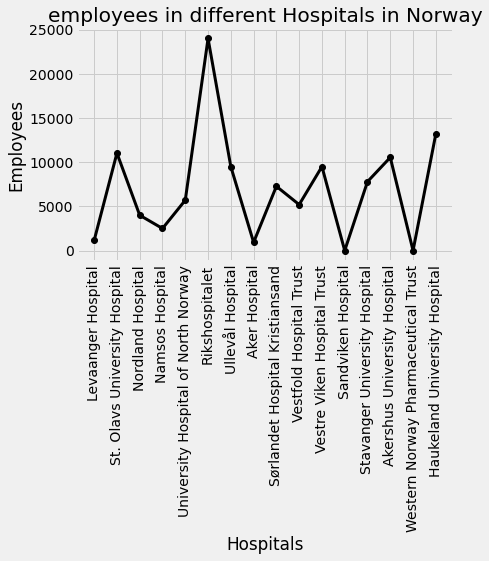

In [40]:
# using .plot() function to see which hospitals have the most employees
# in Norway
plt.plot(Data2['Hospital Name'], Data2['Employees'],
         color='k', marker='o', linewidth=3)


# providing a name for x- and y-axis
plt.ylabel('Employees')
plt.xlabel('Hospitals')

#setting the tick location and the labels of the x-axis
plt.xticks(rotation=90)

# providing title
plt.title('employees in different Hospitals in Norway')

plt.show()

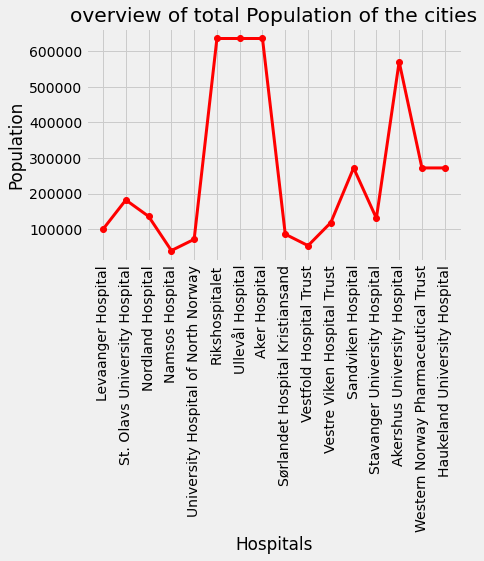

In [28]:
# checking which city has the most population in Norway

plt.plot(Data2['Hospital Name'], Data2['Population'],
        color='red', marker='o', linewidth=3)

#setting the tick location and the labels of the x-axis
plt.xticks(rotation=90)

# providing a name for x- and y-axis and for the title
plt.xlabel('Hospitals')
plt.ylabel('Population')
plt.title('overview of total Population of the cities')
plt.show()


looks like Rikshospitalet, Ullevål Hospital, Aker Hospital and Akershus University hospital
has the most inhabitants in Norway


which hospitals have more beds?


/Users/bruker/.conda/envs/SemesterProjects/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


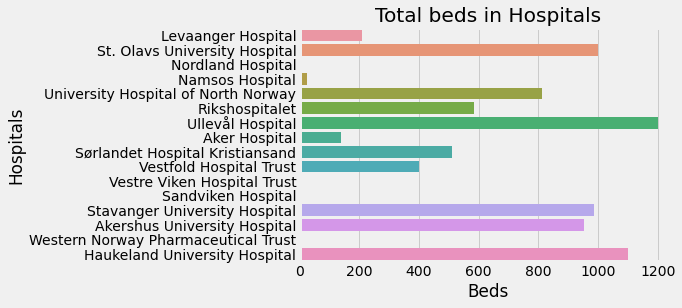

In [29]:
# using sns.barplot() function to put the hospital names
# in the y axis

sns.barplot(Data2['Beds'], Data2['Hospital Name'])


# providing a name for x- and y-axis and for the title
plt.xlabel('Beds')
plt.ylabel('Hospitals')
plt.title('Total beds in Hospitals')

plt.show()

According to newsweek.com, Oslo University hospital,
Haukeland Unversity Hospital, St. Olavs Hospital is
top 3 ranked hospitals in Norway, while in Sweden,
Karolinksa University hospital, Akademiska University Hospital,
Linköping is top 3 ranked.

we can also see from the graphs that Oslo university hospital (Ullevål hospital and rikshospitalet),
haukeland university hospital and St. Olavs hospital has the most bed and employees
than other hospitals in Norway.


Does Norway or Sweden has the most bed and employees?

sources:
- https://www.newsweek.com/best-hospitals-2020/sweden
- https://www.newsweek.com/best-hospitals-2020/norway

In [30]:
# creating series

# Karolinksa University hospital
Karo = pd.Series({'Hospital name': 'Karolinksa University hospital',
        'Beds': 1340,
        'Employees': 5143,
        'Population': 975551})

print(Karo)

# Akademiska University Hospital
Aka = pd.Series({'Hospital name': 'Akademiska University Hospital',
       'Beds': 943,
        'Employees': 8000,
        'Population': 177074})

print(Aka)


# Linköping University Hospital
Lin = pd.Series({'Hospital name': 'Linköping University Hospital',
       'Beds': 600,
       'Employees': 4900,
        'Population': 164616})

print(Lin)


Hospital name    Karolinksa University hospital
Beds                                       1340
Employees                                  5143
Population                               975551
dtype: object
Hospital name    Akademiska University Hospital
Beds                                        943
Employees                                  8000
Population                               177074
dtype: object
Hospital name    Linköping University Hospital
Beds                                       600
Employees                                 4900
Population                              164616
dtype: object


In [31]:
# adding Series to a DataFrame
dcs1 = pd.DataFrame([Karo, Aka, Lin])
dcs1



,Hospital name,Beds,Employees,Population
0,Karolinksa University hospital,1340,5143,975551
1,Akademiska University Hospital,943,8000,177074
2,Linköping University Hospital,600,4900,164616


In [32]:
# selecting specific columns from Data2
newdata2 = Data2[['Hospital Name', 'Beds', 'Employees', 'Population']]

print(newdata2)

# using .loc syntax to get the specific column at index n
newdata25sec = newdata2.loc[[1,5,6,15]]
print(newdata25sec)

                          Hospital Name  Beds  Employees  Population
0                    Levaanger Hospital   207       1152      100000
1         St. Olavs University Hospital  1000      11032      182035
2                     Nordland Hospital     0       4000      136000
3                       Namsos Hospital    23       2500       40000
4   University Hospital of North Norway   812       5700       71590
5                        Rikshospitalet   585      24000      635293
6                      Ullevål Hospital  1200       9500      635293
7                         Aker Hospital   138        930      635293
8       Sørlandet Hospital Kristiansand   509       7272       85983
9               Vestfold Hospital Trust   400       5200       53818
10          Vestre Viken Hospital Trust     0       9500      118588
11                   Sandviken Hospital     0          0      271949
12        Stavanger University Hospital   985       7800      130754
13         Akershus University Hos

Adding both data of Sweden hospital and Norwegian hospital together for
visualization

starting with total beda

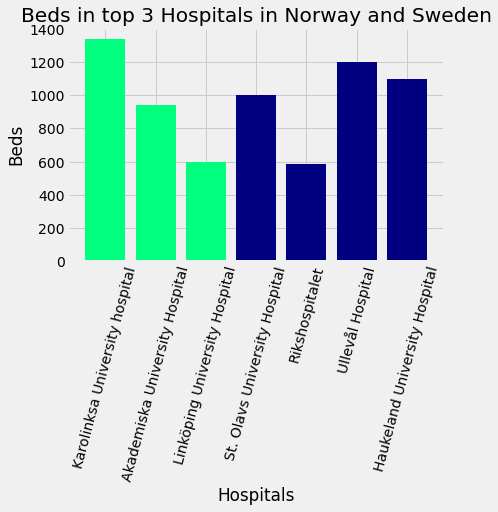

In [41]:
#using .bar() function to add both data

# Sweden Hospitals
plt.bar(dcs1['Hospital name'], dcs1['Beds'], color='springgreen')

# Norwegian hospitals
plt.bar(newdata25sec['Hospital Name'], newdata25sec['Beds'], color='navy')

#setting the tick location and the labels of the x-axis
plt.xticks(rotation=75)

plt.xlabel('Hospitals')
plt.ylabel('Beds')
plt.title('Beds in top 3 Hospitals in Norway and Sweden')
plt.show()

Total employees

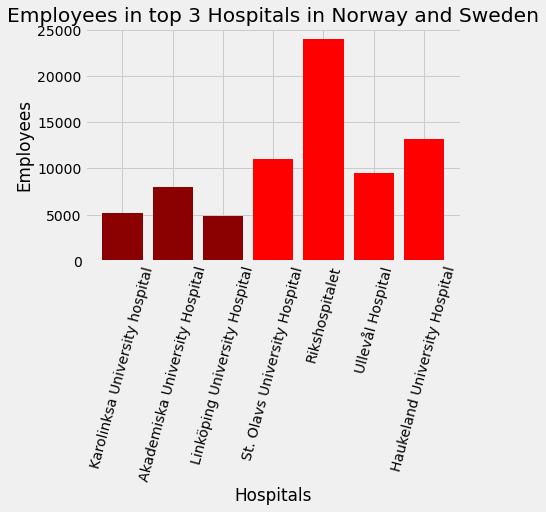

In [35]:
# using the same method from last one

# Sweden Hospital
plt.bar(dcs1['Hospital name'], dcs1['Employees'], color='darkred')

# Norwegian hospital
plt.bar(newdata25sec['Hospital Name'], newdata25sec['Employees'], color='red')

plt.xticks(rotation=75)
plt.xlabel('Hospitals')
plt.ylabel('Employees')
plt.title('Employees in top 3 Hospitals in Norway and Sweden')
plt.show()

result:
even though Karolinska Unuversity Hospital has more bed than top 3
Norwgians Hospital, Norway has the most Employees than top 3 hospitals in Sweden.

but, does population in the cities something to say?



total population

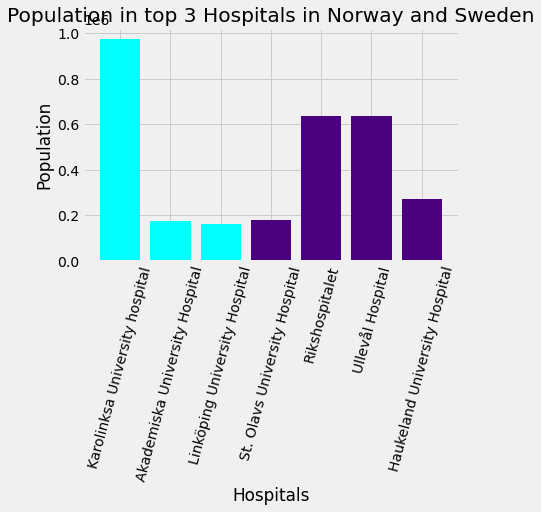

In [39]:
# Sweden Hospital
plt.bar(dcs1['Hospital name'], dcs1['Population'], color='cyan')

# Norwegian Hospital
plt.bar(newdata25sec['Hospital Name'], newdata25sec['Population'], color='indigo')

plt.xticks(rotation=75)
plt.xlabel('Hospitals')
plt.ylabel('Population')
plt.title('Population in top 3 Hospitals in Norway and Sweden')
plt.show()

Result:
Population does have something to say for some hospitals.  Karolinska University Hospital, which
is located in Stockholm, has more bed but less employees than other hospitals. while Oslo University Hospital has
a lot of bed and employee if you combine Ullevål and Rikshospitalet together, since both of hospitals are located in Oslo.
But the number of population in Oslo is not high as the Stockolm.
Is strange to see that Karolinska University hospital has more bed, less employees when their
population is high. Rikshospitalet is oppisite. Stockholm should have the same total Employees and beds.

